<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## Density-Based Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository. They can be skipped if data is available locally.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


# Density-Based Clustering

## Preliminary

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from itertools import product
from datetime import datetime

In [4]:
df_clustering_dbscan = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

### Dataset Cleaning and Selection

In [5]:
df_clustering_dbscan['state'].value_counts()

Illinois         10370
Florida           7002
California        6474
Ohio              5175
Texas             4993
Georgia           4378
Pennsylvania      4327
Tennessee         3642
Missouri          3538
Louisiana         3493
Maryland          3259
Massachusetts     3157
Indiana           2873
Wisconsin         2795
Michigan          2699
Virginia          2586
Alabama           2488
Kentucky          2028
Connecticut       1832
Arkansas          1570
Colorado          1519
Mississippi       1510
Washington        1462
Iowa              1428
Oregon            1282
Kansas            1118
Oklahoma          1010
Arizona            851
Nevada             815
Nebraska           697
Minnesota          687
Maine              523
Utah               391
Idaho              260
Vermont            188
Delaware           126
Alaska              15
Name: state, dtype: int64

In [6]:
df_clustering_dbscan_alabama = df_clustering_dbscan[df_clustering_dbscan['state'] == 'Alabama'].drop(columns=['state', 'state_congressional_district'])

In [7]:
df_clustering_dbscan_alabama.head()

,city_or_county,latitude,longitude,avg_age_participants,datetime,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
41,Daphne,30.6432,-87.9076,19.0,2017-02-14,1.0,14.7,0.0,0.000000,0.0,0.963825,0.042553,0.0,0.000,0.0
149,Mobile,30.6702,-88.2254,24.0,2017-02-17,1.0,14.7,0.0,0.000000,0.0,0.963825,0.021277,0.0,0.000,0.0
204,Huntsville,34.7442,-86.5912,37.0,2015-08-23,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0
206,Auburn,32.6208,-85.4922,36.0,2014-06-28,1.0,16.8,0.0,0.500000,0.5,0.661205,0.090909,0.0,0.125,0.2
323,Lanett,32.8708,-85.2010,25.0,2017-05-22,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0


In [8]:
df_clustering_dbscan_alabama.drop(columns=['city_or_county', 'datetime'], inplace=True)

As for KMeans, we will compare the results with `StandardScaler` and `MinMaxScaler`.

In [9]:
# Standardize the features
std_scaler, min_max_scaler = StandardScaler(), MinMaxScaler()
df_dbscan_std_scaled = std_scaler.fit_transform(df_clustering_dbscan_alabama)
df_dbscan_min_max_scaled = min_max_scaler.fit_transform(df_clustering_dbscan_alabama)

In [10]:
df_dbscan_normal = df_clustering_dbscan_alabama.to_numpy()

## DBScan without scaling

In [11]:
S = np.sqrt(np.sum(np.square(df_dbscan_normal), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[ 96.15494066  97.56229694 101.60900179 ... 102.01547759  95.57750146
  95.94726592]
93.41228769512902
115.94006855615717
99.95248437913406


In [12]:
eps_values = np.array([1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 21, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

44

In [13]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_normal)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score.append(silhouette_score(df_dbscan_normal, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score.append(None)

[08-01-2024 18:35:41] Starting DBScan with p = (1.0, 5)
[08-01-2024 18:35:41] Got 92 clusters. Starting to calculate silhouette_score with p = (1.0, 5)
[08-01-2024 18:35:41] Starting DBScan with p = (1.0, 10)
[08-01-2024 18:35:41] Got 24 clusters. Starting to calculate silhouette_score with p = (1.0, 10)
[08-01-2024 18:35:42] Starting DBScan with p = (1.0, 15)
[08-01-2024 18:35:42] Got 11 clusters. Starting to calculate silhouette_score with p = (1.0, 15)
[08-01-2024 18:35:42] Starting DBScan with p = (1.0, 20)
[08-01-2024 18:35:42] Got 5 clusters. Starting to calculate silhouette_score with p = (1.0, 20)
[08-01-2024 18:35:43] Starting DBScan with p = (1.1, 5)
[08-01-2024 18:35:43] Got 40 clusters. Starting to calculate silhouette_score with p = (1.1, 5)
[08-01-2024 18:35:43] Starting DBScan with p = (1.1, 10)
[08-01-2024 18:35:43] Got 18 clusters. Starting to calculate silhouette_score with p = (1.1, 10)
[08-01-2024 18:35:43] Starting DBScan with p = (1.1, 15)
[08-01-2024 18:35:44] Go

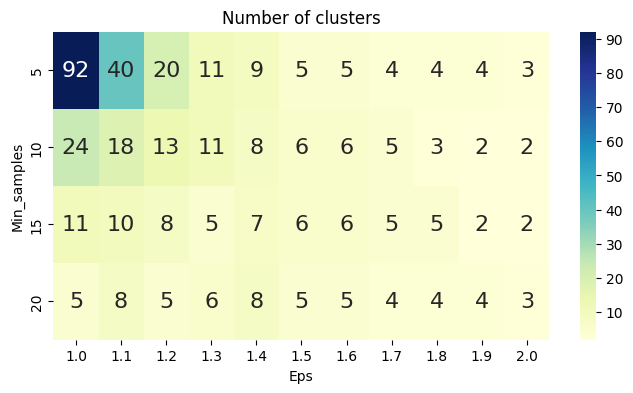

In [14]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

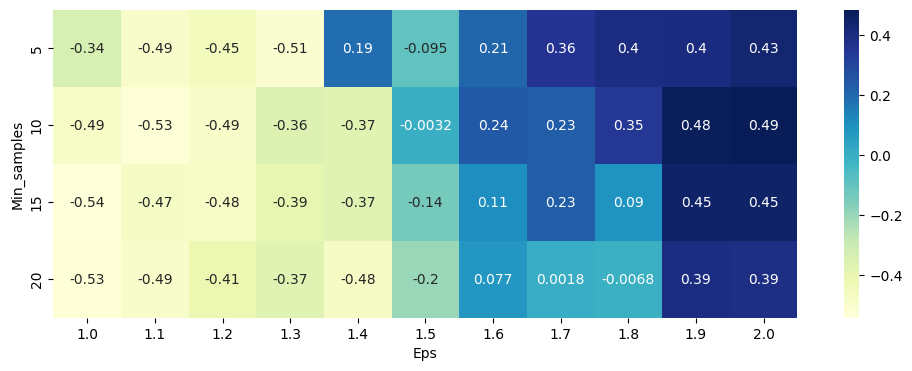

In [15]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,4))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, if we exclude the cases with $2$ clusters (which mean a single cluster and outliers) and the cases with more than $10$ clusters, global maximum is $0.43$ with $min\_samples = 5, eps = 2.0$ and $3$ clusters (including outliers).

In [46]:
DBS_clustering = DBSCAN(eps=2.0, min_samples=5).fit(df_dbscan_normal)

df_dbscan_alabama_normal_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_normal_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [47]:
df_dbscan_alabama_normal_clustered['Cluster'].value_counts()

 0    2467
 1      11
-1      10
Name: Cluster, dtype: int64

In [22]:
df_dbscan_alabama_normal_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
41,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.042553,0.0,0.000,0.0,0
149,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.021277,0.0,0.000,0.0,0
204,34.7442,-86.5912,37.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
206,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.090909,0.0,0.125,0.2,0
323,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,0


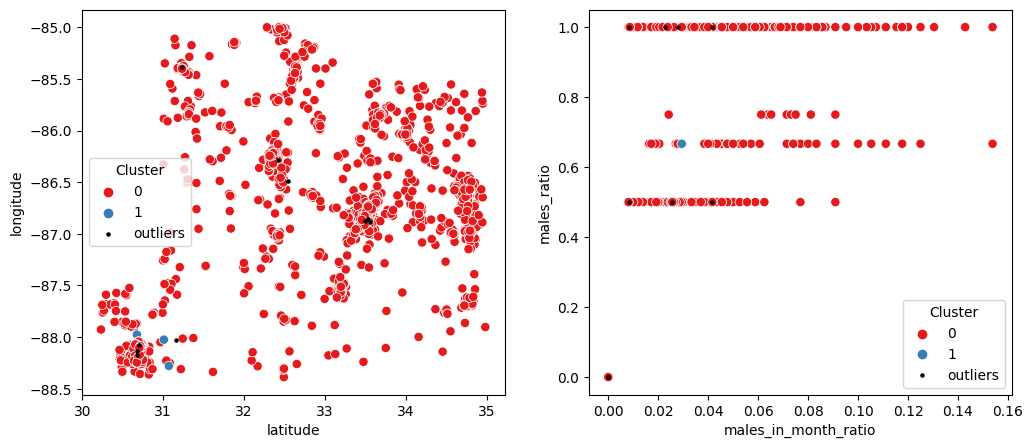

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()

## DBScan with StandardScaler

In [24]:
S = np.sqrt(np.sum(np.square(df_dbscan_std_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[3.34832268 3.35529259 3.26113203 ... 3.37144715 2.89795888 2.35149852]
1.419941443223005
8.929165822199884
3.467057361643649


In [25]:
eps_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 41, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

104

In [26]:
no_of_clusters_std_scaler = []
sil_score_std_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_std_scaled)
  no_of_clusters_std_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_std_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_std_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_std_scaler.append(silhouette_score(df_dbscan_std_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_std_scaler.append(None)

[08-01-2024 18:37:43] Starting DBScan with p = (0.8, 5)
[08-01-2024 18:37:43] Got 63 clusters. Starting to calculate silhouette_score with p = (0.8, 5)
[08-01-2024 18:37:43] Starting DBScan with p = (0.8, 10)
[08-01-2024 18:37:44] Got 21 clusters. Starting to calculate silhouette_score with p = (0.8, 10)
[08-01-2024 18:37:44] Starting DBScan with p = (0.8, 15)
[08-01-2024 18:37:44] Got 14 clusters. Starting to calculate silhouette_score with p = (0.8, 15)
[08-01-2024 18:37:44] Starting DBScan with p = (0.8, 20)
[08-01-2024 18:37:44] Got 9 clusters. Starting to calculate silhouette_score with p = (0.8, 20)
[08-01-2024 18:37:44] Starting DBScan with p = (0.8, 25)
[08-01-2024 18:37:44] Got 6 clusters. Starting to calculate silhouette_score with p = (0.8, 25)
[08-01-2024 18:37:45] Starting DBScan with p = (0.8, 30)
[08-01-2024 18:37:45] Got 5 clusters. Starting to calculate silhouette_score with p = (0.8, 30)
[08-01-2024 18:37:45] Starting DBScan with p = (0.8, 35)
[08-01-2024 18:37:45] Go

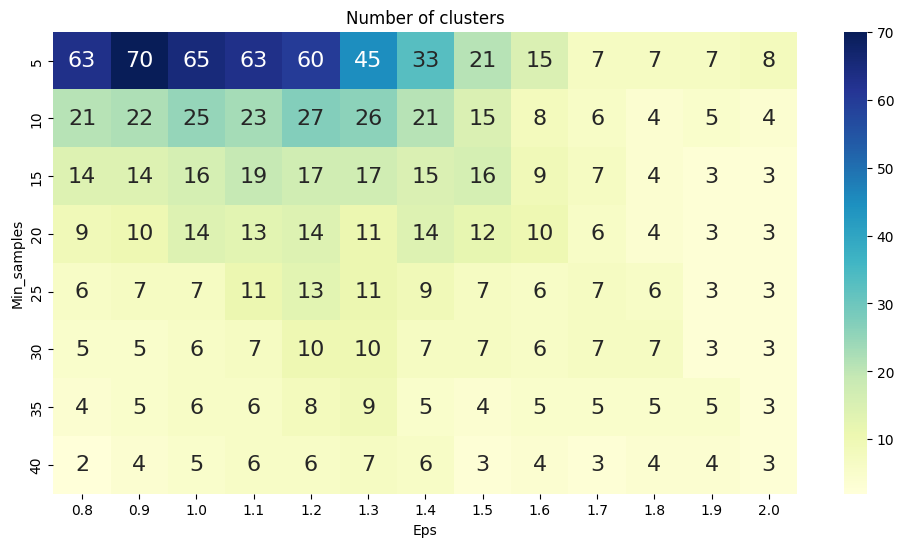

In [27]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_std_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

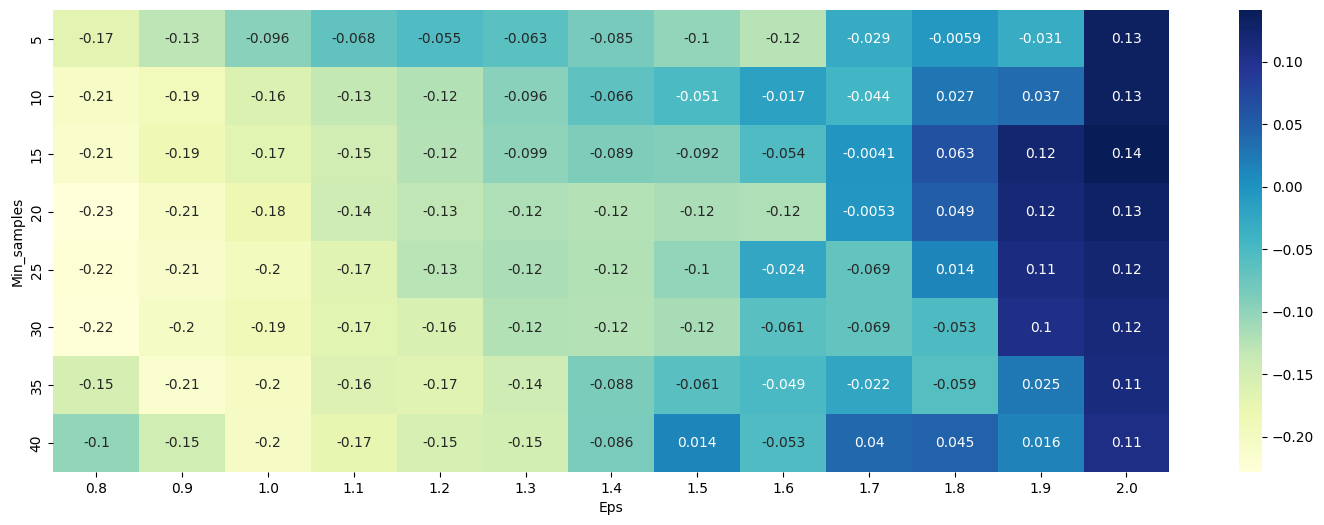

In [28]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_std_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, global maximum is $0.14$ with $min\_samples = 15, eps = 2.0$ and $3$ clusters (including outliers).

In [31]:
DBS_clustering = DBSCAN(eps=2.0, min_samples=15).fit(df_dbscan_std_scaled)

df_dbscan_alabama_std_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_std_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [32]:
df_dbscan_alabama_std_clustered['Cluster'].value_counts()

 0    2015
-1     339
 1     134
Name: Cluster, dtype: int64

In [33]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
41,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.042553,0.0,0.000,0.0,0
149,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.021277,0.0,0.000,0.0,0
204,34.7442,-86.5912,37.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
206,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.090909,0.0,0.125,0.2,-1
323,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,-1


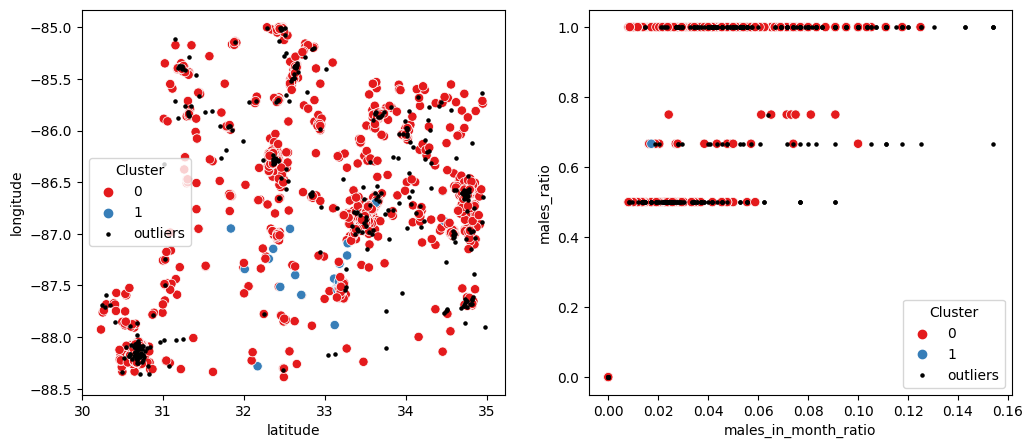

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()

## DBScan with MinMaxScaler

In [35]:
S = np.sqrt(np.sum(np.square(df_dbscan_min_max_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[1.4269585  1.41191202 1.39702488 ... 1.7456236  1.97854603 1.67139402]
0.39912520042297805
2.517670292555358
1.7718700730479184


In [36]:
eps_values = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])  # eps values to be investigated (18 combinations)
min_samples = np.arange(10, 110, 10)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

100

In [37]:
no_of_clusters_min_max_scaler = []
sil_score_min_max_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_min_max_scaled)
  no_of_clusters_min_max_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_min_max_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_min_max_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_min_max_scaler.append(silhouette_score(df_dbscan_min_max_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_min_max_scaler.append(None)

[08-01-2024 18:39:33] Starting DBScan with p = (0.4, 10)
[08-01-2024 18:39:34] Got 23 clusters. Starting to calculate silhouette_score with p = (0.4, 10)
[08-01-2024 18:39:34] Starting DBScan with p = (0.4, 20)
[08-01-2024 18:39:34] Got 18 clusters. Starting to calculate silhouette_score with p = (0.4, 20)
[08-01-2024 18:39:35] Starting DBScan with p = (0.4, 30)
[08-01-2024 18:39:36] Got 12 clusters. Starting to calculate silhouette_score with p = (0.4, 30)
[08-01-2024 18:39:36] Starting DBScan with p = (0.4, 40)
[08-01-2024 18:39:36] Got 9 clusters. Starting to calculate silhouette_score with p = (0.4, 40)
[08-01-2024 18:39:37] Starting DBScan with p = (0.4, 50)
[08-01-2024 18:39:37] Got 7 clusters. Starting to calculate silhouette_score with p = (0.4, 50)
[08-01-2024 18:39:38] Starting DBScan with p = (0.4, 60)
[08-01-2024 18:39:38] Got 6 clusters. Starting to calculate silhouette_score with p = (0.4, 60)
[08-01-2024 18:39:39] Starting DBScan with p = (0.4, 70)
[08-01-2024 18:39:39] 

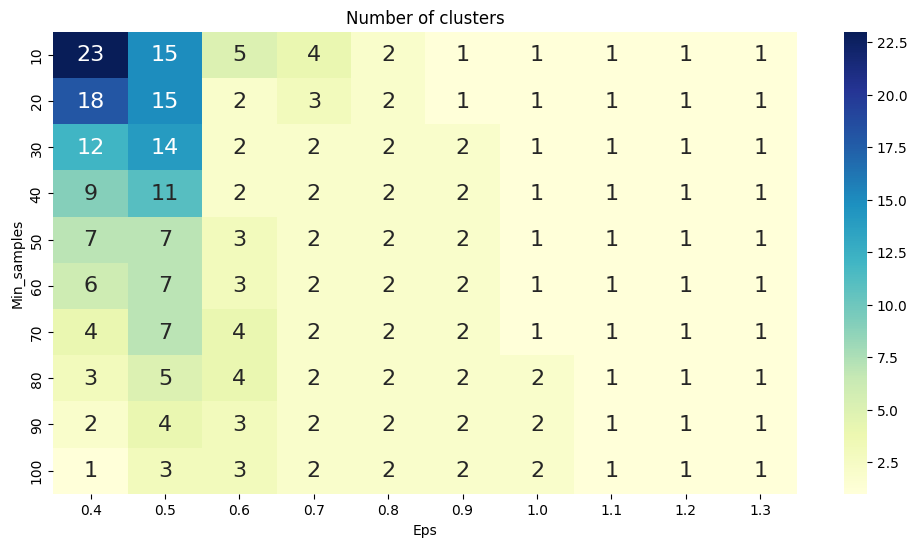

In [38]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

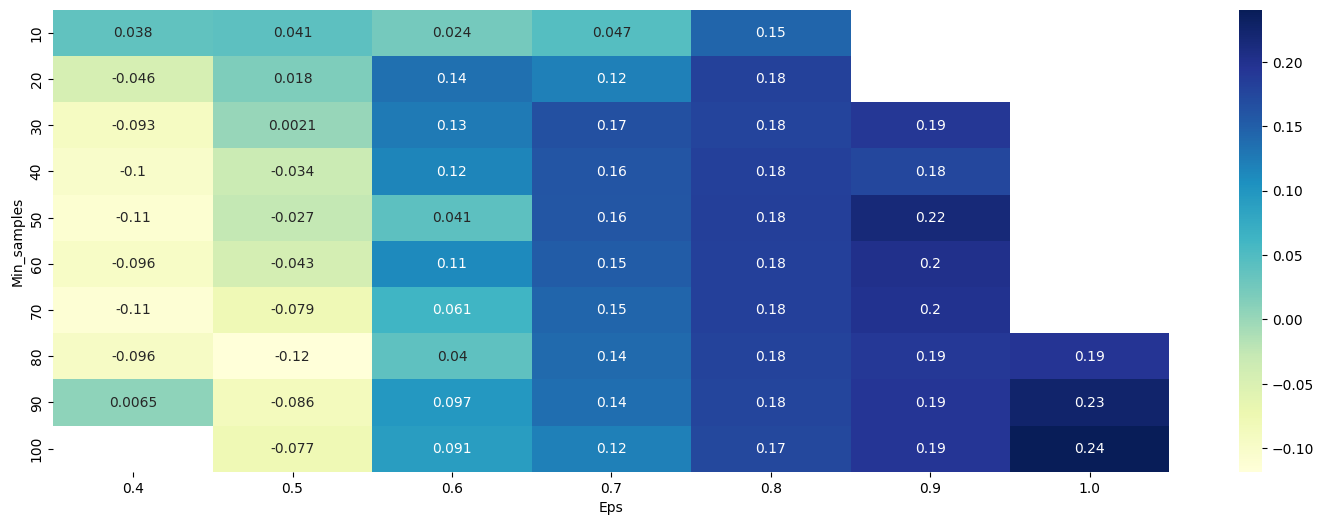

In [39]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

We can take a value of $0.12$ with $min\_samples = 20, eps = 0.7$ and $3$ clusters (including outliers).

In [40]:
DBS_clustering = DBSCAN(eps=0.7, min_samples=20).fit(df_dbscan_min_max_scaled)

df_dbscan_alabama_min_max_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_min_max_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [41]:
df_dbscan_alabama_min_max_clustered['Cluster'].value_counts()

 0    2308
-1     159
 1      21
Name: Cluster, dtype: int64

In [42]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
41,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.042553,0.0,0.000,0.0,0
149,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.021277,0.0,0.000,0.0,0
204,34.7442,-86.5912,37.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
206,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.090909,0.0,0.125,0.2,-1
323,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,-1


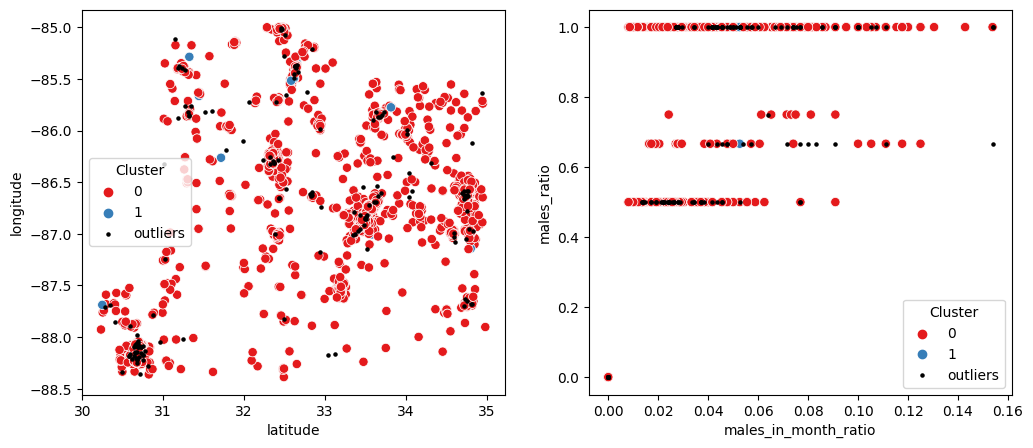

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()

## Final Comments
As we have seen, in terms of `Silhouette Score`, we got the best results **without** normalizing the data, with a score of $0.31$ and $2$ clusters (plus outliers). Instead, normalization seems to penalize the final results, getting $0.075$ and $0.083$ with $3$ and $2$ clusters (plus outliers).

Interpretability is still an issue for us, and we will work towards better interpretability for the final delivery.